In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/glass")

print("Path to dataset files:", path)

100%|██████████| 3.42k/3.42k [00:00<00:00, 2.74MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/glass/versions/1


In [ ]:
#importing necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

In [ ]:
df= pd.read_csv("/root/.cache/kagglehub/datasets/uciml/glass/versions/1/glass.csv")
df.count()

,0
RI,214
Na,214
Mg,214
Al,214
Si,214
K,214
Ca,214
Ba,214
Fe,214
Type,214


In [ ]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [ ]:
df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
df['Type'].value_counts()

,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


In [ ]:
df['Type']= df['Type'].astype('category')

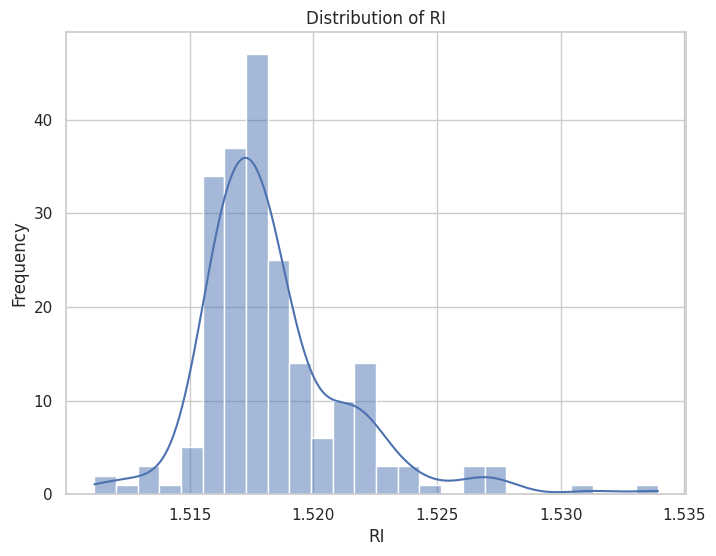

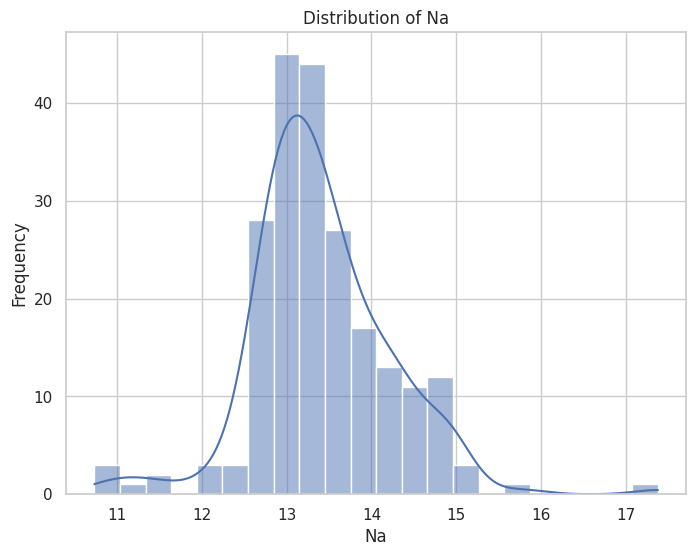

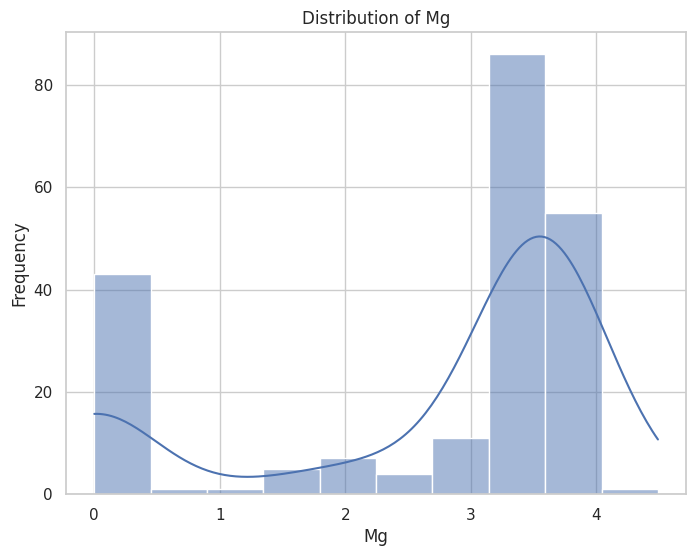

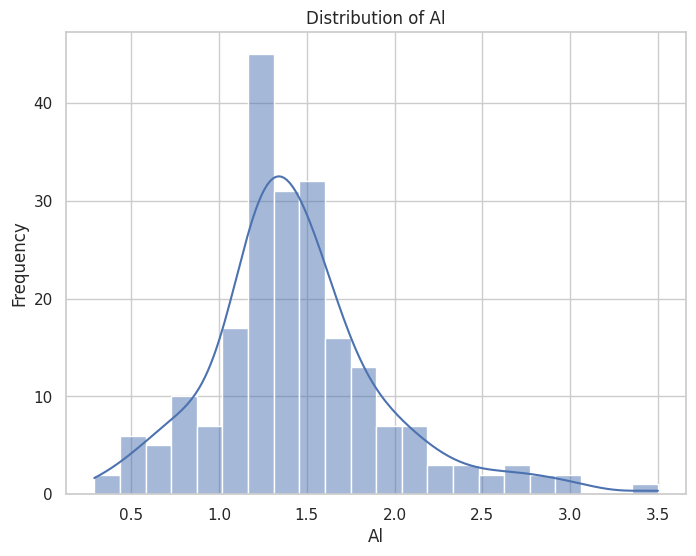

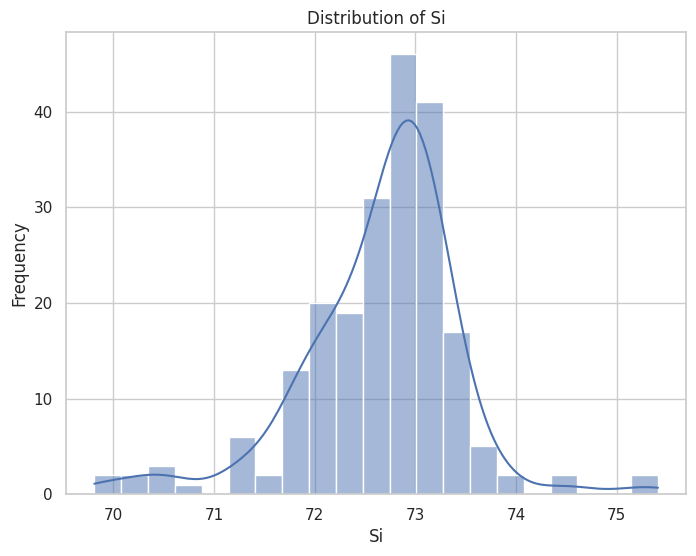

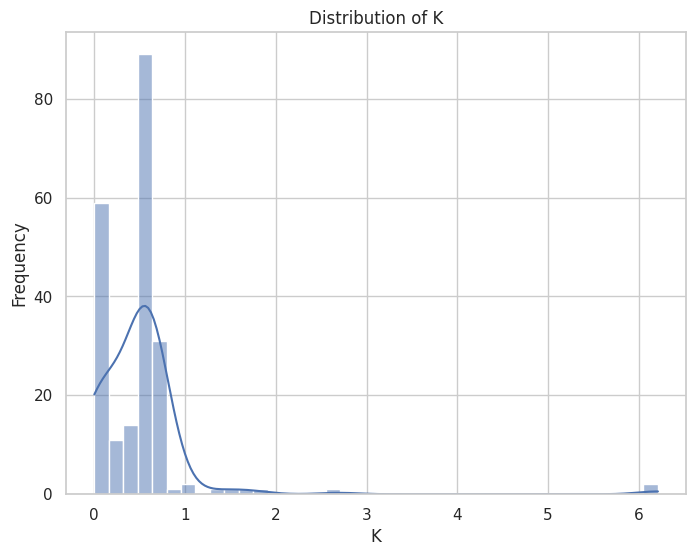

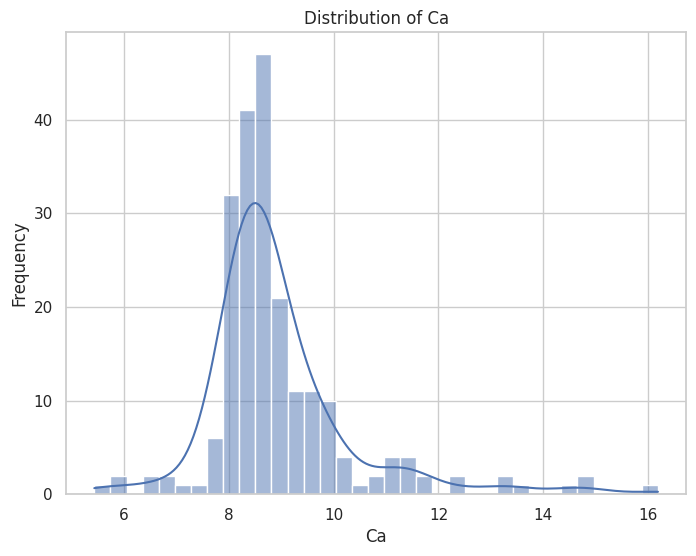

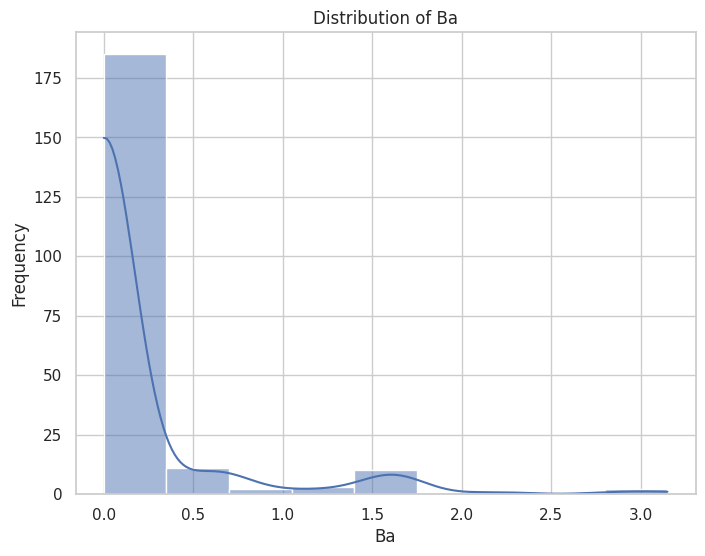

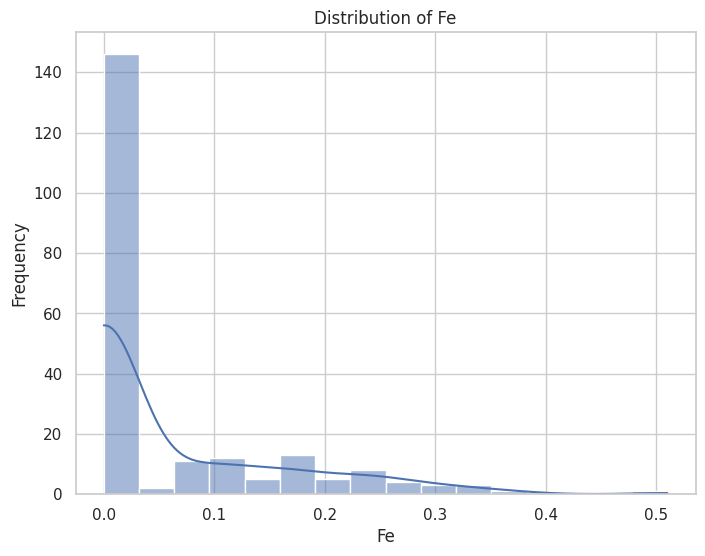

In [ ]:
#plotting frequency distributions

df_numeric= df.drop('Type', axis=1)
sns.set(style="whitegrid")

for column in df_numeric.columns:
  plt.figure(figsize=(8,6))
  sns.histplot(df_numeric[column], kde="true")
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()

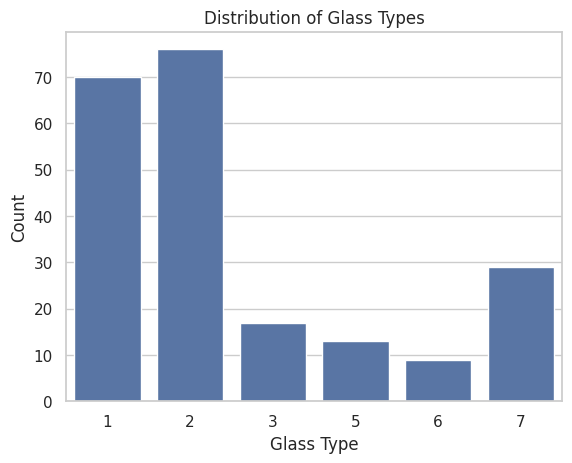

In [ ]:
sns.countplot(x='Type', data=df)
plt.title('Distribution of Glass Types')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.show()

<Axes: >

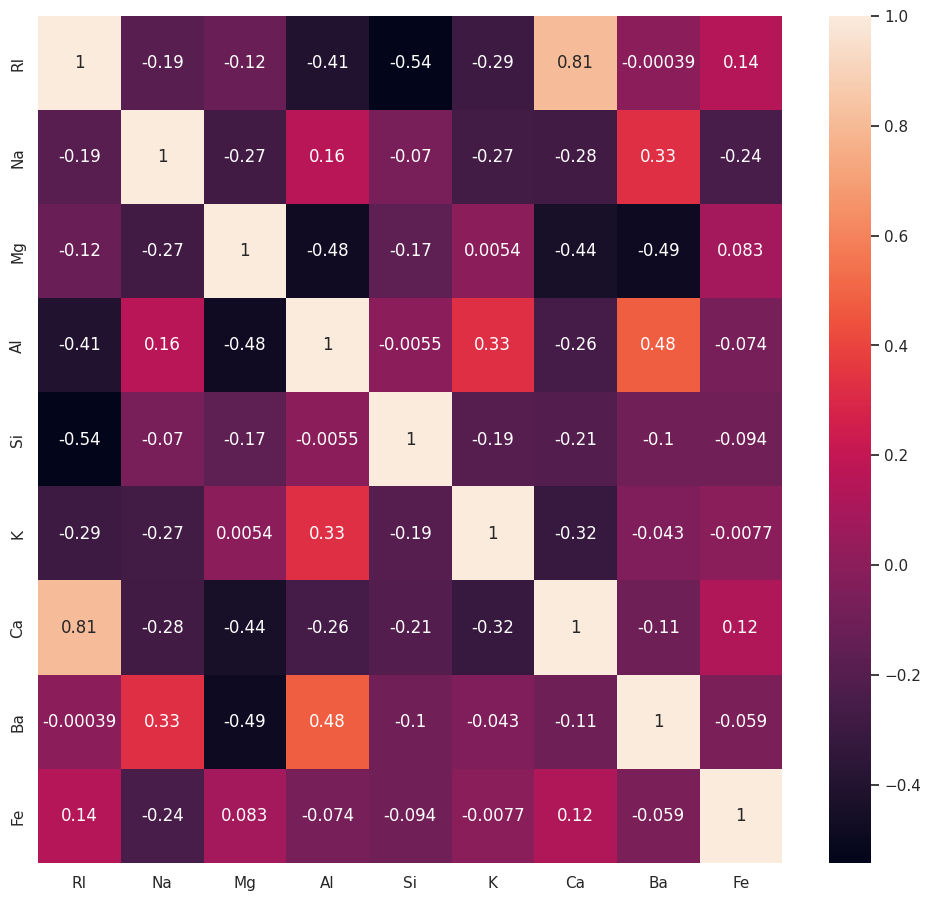

In [ ]:
#correlation head map
plt.figure(figsize=(12,11))
sns.heatmap(df_numeric.corr(),annot= True)

<Axes: >

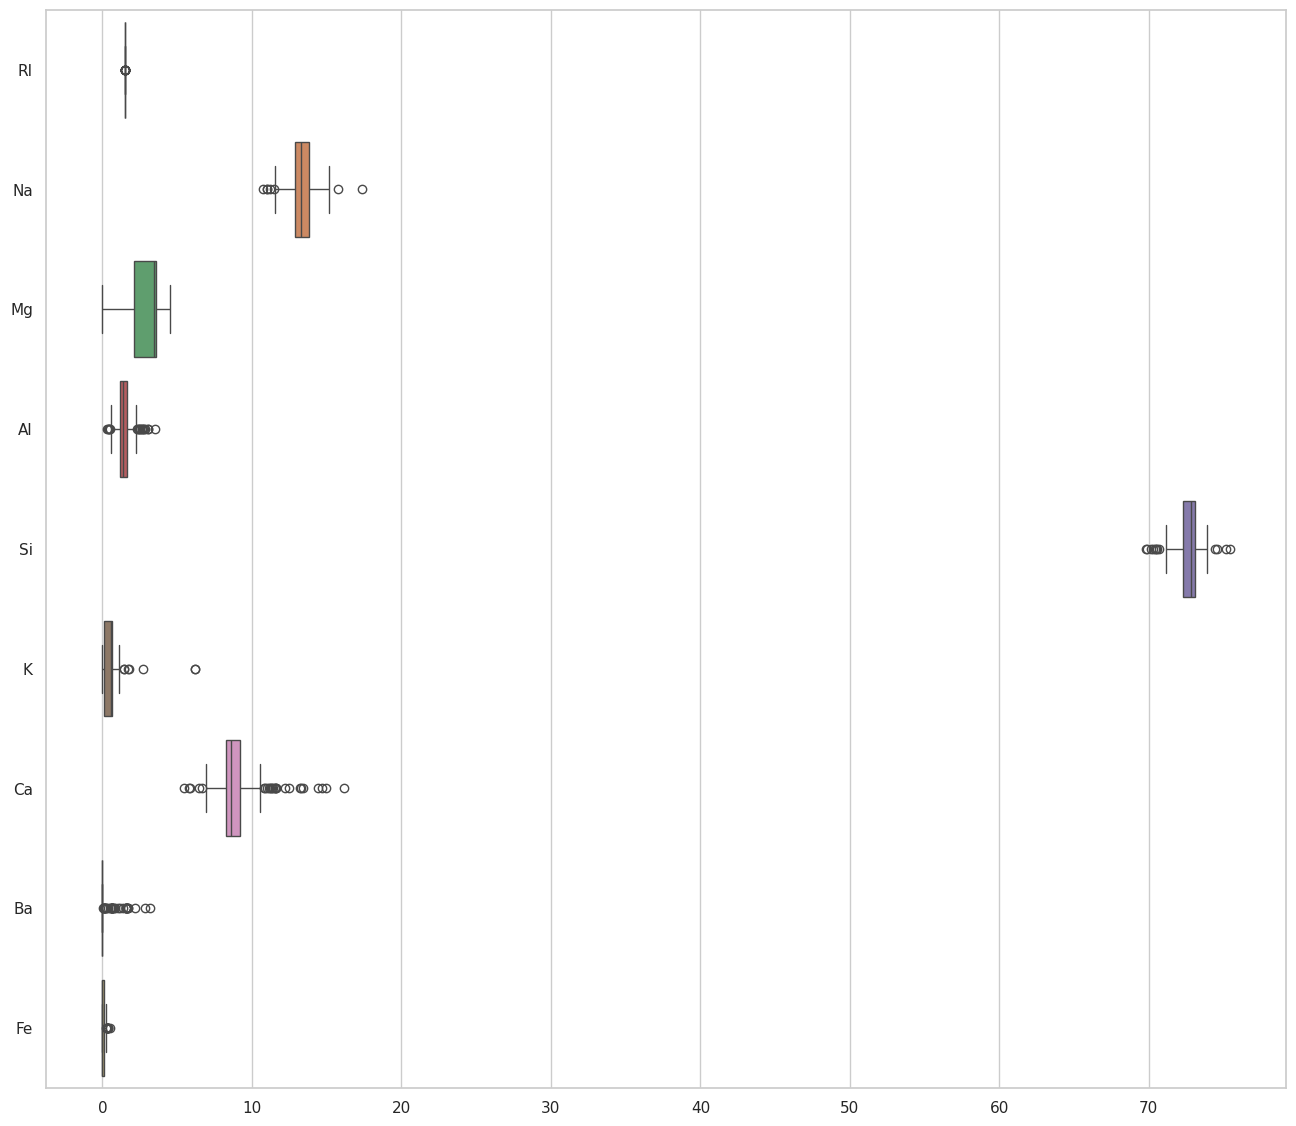

In [ ]:
#box plot of numerical column
plt.figure(figsize=(16,14))
sns.boxplot(data= df_numeric, orient="h")

In [ ]:
#declare features
X= df.drop('Type', axis=1)
y= df['Type']

In [ ]:
features= list(X.columns)


In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=100)

In [ ]:
#initializing the rf classifier
rfc_50= RandomForestClassifier(n_estimators= 50, random_state=100)

#training
rfc_50.fit(X_train, y_train)

#predicting
y_pred_50= rfc_50.predict(X_test)

print(f'Model accuracy is {accuracy_score(y_test, y_pred_50)}')

Model accuracy is 0.8837209302325582


In [ ]:
joblib.dump(value=rfc_50, filename="/content/drive/MyDrive/GlassClassifier.pkl")

['/content/drive/MyDrive/GlassClassifier.pkl']

In [ ]:
rfc_pred_model= joblib.load("GlassClassifier.pkl")

In [ ]:
sample= np.array([1.52, 13.64, 4.4, 1.1, 71.78, 0.06, 8.75, 0, 0])
sample_df= pd.DataFrame([sample],columns=features)
sample_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52,13.64,4.4,1.1,71.78,0.06,8.75,0.0,0.0


In [ ]:
prediction = rfc_pred_model.predict(sample_df)
print(prediction)

[1]
